# Repeat pandas

##### read csv data

In [1]:
import pandas as pd

In [ ]:
# create a dataframe object by reading a csv data file

#use a relative path to identify the location of the file 
#df = pd.read_csv("data/taxis.csv") #use a relative path to identify the location of the file 

#alternative, use an absolute path to identify the location of the file
df = pd.read_csv("~/Documents/Course Prep/Python_OPA24_code_along/data/taxis.csv")

##### use head() method of dataframe object to see the first few rows

In [6]:
df.head(2) #default no. of rows is 5

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan


##### to make it simple, drop rows with missing data

In [8]:
#by only writing df.dropna(), the original dataframe is not changed
#it's to do with in the source code of pandas for dropna() method, there is no code for reassigning the change to the original df

df = df.dropna()

In [ ]:
#we can do an extra check with infor() method to ensure that the resulting df is after dropping rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6341 non-null   object 
 1   dropoff          6341 non-null   object 
 2   passengers       6341 non-null   int64  
 3   distance         6341 non-null   float64
 4   fare             6341 non-null   float64
 5   tip              6341 non-null   float64
 6   tolls            6341 non-null   float64
 7   total            6341 non-null   float64
 8   color            6341 non-null   object 
 9   payment          6341 non-null   object 
 10  pickup_zone      6341 non-null   object 
 11  dropoff_zone     6341 non-null   object 
 12  pickup_borough   6341 non-null   object 
 13  dropoff_borough  6341 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 743.1+ KB


#### create a new boolean column, df["cross_borough"], with a condition

In [11]:
#select a column using square bracket syntax
df["pickup_borough"]

0       Manhattan
1       Manhattan
2       Manhattan
3       Manhattan
4       Manhattan
          ...    
6428    Manhattan
6429       Queens
6430     Brooklyn
6431     Brooklyn
6432     Brooklyn
Name: pickup_borough, Length: 6341, dtype: object

In [12]:
#assign new column name to a condition
#this should return a boolean column 
df["cross_borough"] = df["dropoff_borough"] != df["pickup_borough"]
df["cross_borough"]


0       False
1       False
2       False
3       False
4       False
        ...  
6428    False
6429     True
6430    False
6431    False
6432    False
Name: cross_borough, Length: 6341, dtype: bool

In [13]:
df.head(2)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,cross_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,False
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,False


In [14]:
#check the unique value for this new column
df["cross_borough"].unique()

array([False,  True])

In [15]:
#check the frequency count of different values in the new column
df["cross_borough"].value_counts()

cross_borough
False    5545
True      796
Name: count, dtype: int64

In [18]:
#how many boroughs are in the data
df["dropoff_borough"].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
#after .size(), we have got a multiindes series
#use .reset_index() to return a dataframe instead, becasue it's easier to work with
grouped = df.groupby(["payment", "cross_borough"]).size().reset_index(name="trip_count")
grouped

,payment,cross_borough,trip_count
0,cash,False,1616
1,cash,True,179
2,credit card,False,3929
3,credit card,True,617


In [ ]:
#create a new dataframe by selecting rows from grouped dataframe
cash = grouped[grouped["payment"] == "cash"]
cash



,payment,cross_borough,trip_count
0,cash,False,1616
1,cash,True,179


In [29]:
credit = grouped[grouped["payment"] == "credit card"]
credit

,payment,cross_borough,trip_count
2,credit card,False,3929
3,credit card,True,617


In [37]:
payment_count = df.groupby("payment").size()
payment_count

payment
cash           1795
credit card    4546
dtype: int64

# Repeat matplotlib

In [30]:
import matplotlib.pyplot as plt

In [31]:
x = [1,2,3]
y = [2,4,5]

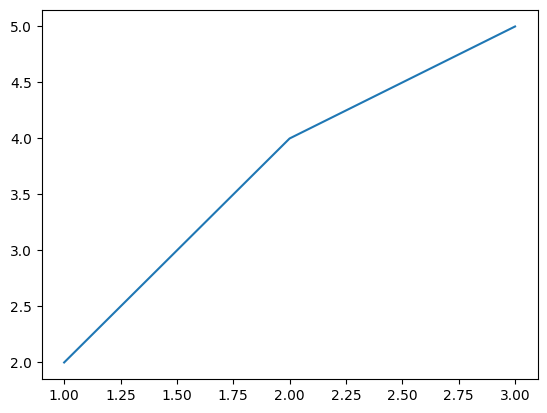

In [ ]:
#create graph using funtional approach: 
    #no object is created now
    #we call for a function from the module called pyplot
    #plot() is a function
plt.plot(x, y)

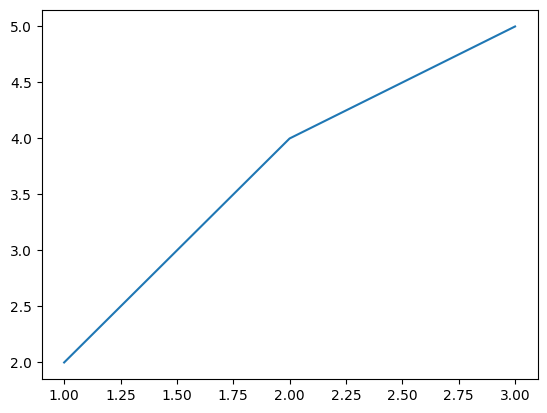

In [34]:
#create graph using OOP approch
fig = plt.figure() #we instantiate an object from the figure class in plt module
ax = plt.axes() #we instantiate an object from the axes class in plt module

#now in ax object, call for the plot() method
ax.plot(x, y)

(0.0, 4000.0)

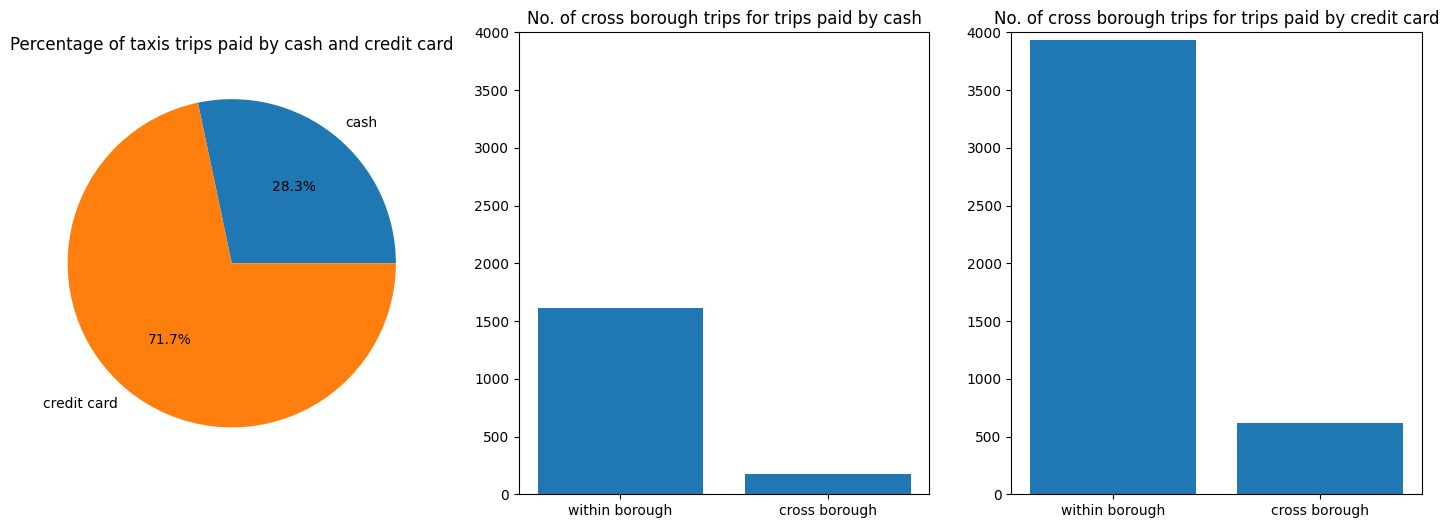

In [50]:
#create fig and axs object from a function from plt module

fig, axs = plt.subplots(1, 3, figsize =(18,6))

axs[0].pie(payment_count,
           labels = payment_count.index,
           autopct='%1.1f%%')
axs[0].set_title("Percentage of taxis trips paid by cash and credit card")

axs[1].bar(cash["cross_borough"], cash["trip_count"])
axs[1].set_title("No. of cross borough trips for trips paid by cash")
axs[1].set_xticks([0,1])
axs[1].set_xticklabels(["within borough","cross borough"])
axs[1].set_ylim(0,4000)

axs[2].bar(credit["cross_borough"], credit["trip_count"])
axs[2].set_title("No. of cross borough trips for trips paid by credit card")
axs[2].set_xticks([0,1])
axs[2].set_xticklabels(["within borough","cross borough"])
axs[2].set_ylim(0,4000)
